# Le machine learning

### La régression linéaire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from statsmodels.formula.api import ols

In [4]:
#on récupère les données
frame_adv=pd.read_csv("Advertising.csv",index_col=0)

In [5]:
#ajustement du modèle de régression
modele_ols1=ols("Sales ~ TV + Radio +Newspaper",data=frame_adv).fit()

In [6]:
modele_ols1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 29 May 2017   Prob (F-statistic):           1.58e-96
Time:                        16:26:19   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

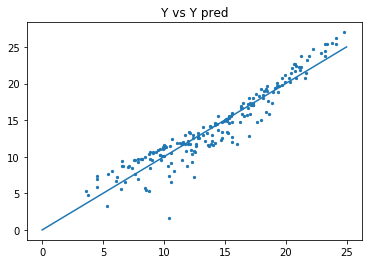

In [7]:
#on représente les valeurs prédites en fonction des valeurs observées
plt.scatter(modele_ols1.predict
            (frame_adv[["TV","Radio","Newspaper"]]), 
            frame_adv["Sales"],s=5)
x=np.linspace(0,25,100)
plt.plot(x,x)
plt.title("Y vs Y pred")

In [8]:
#avec scikit-learn
from sklearn.linear_model import LinearRegression

In [9]:
#on crée un objet avec les hyperparamètres du modèle
modele_ols2=LinearRegression()

In [10]:
#on extrait X et y
X=frame_adv.drop("Sales",axis=1)
y=frame_adv["Sales"]

In [11]:
#on sépare le jeu de données en apprentisaage / validation
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3)

In [13]:
#on ajuste le modèle aux données
modele_ols2.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
#on affiche les coefficients
modele_ols2.coef_

array([ 0.04380405,  0.20253973, -0.00571579])

In [15]:
#on calcule les résidus
residus_ols=y_test-modele_ols2.predict(X_test)

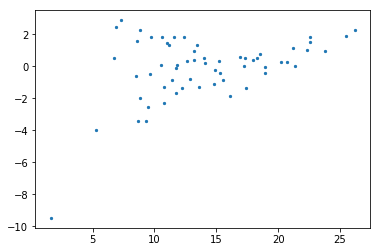

In [16]:
#on représente y par rapport aux résidus
plt.scatter(y_test,residus_ols,s=5)

In [17]:
from sklearn.metrics import mean_squared_error

In [18]:
#on calcule la RMSE
mean_squared_error(y_test,modele_ols2.predict(X_test))

3.7393109263289714

### ACP avec Scikit-learn

In [19]:
from sklearn.decomposition import PCA

Faire une ACP sur les données iris et représenter les deux premières composantes

In [20]:
frame_iris=pd.read_excel("iris.xlsx")

In [21]:
X=frame_iris.drop("Espece",axis=1)

In [22]:
acp=PCA()

In [23]:
acp.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
acp.explained_variance_ratio_

array([ 0.92293779,  0.05595107,  0.01528903,  0.0058221 ])

In [25]:
#coordonnées des observations sur les composantes
X_r=acp.transform(X)

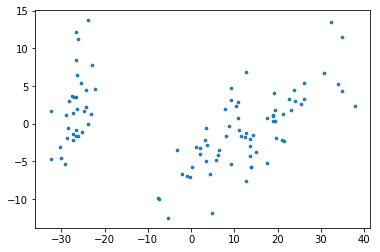

In [26]:
plt.scatter(X_r[:,0],X_r[:,1],s=7)

In [27]:
y=frame_iris["Espece"]
y.unique()

array(['Setosa', 'Virginica', 'Versicolor'], dtype=object)

### Les plus proches voisins

In [28]:
frame_nba=pd.read_csv("nba_2013.csv")

In [29]:
frame_nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [30]:
tp=frame_nba[frame_nba["player"]=="Tony Parker"]

In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
#on supprime les données manquantes
frame_nba.dropna(inplace=True)

In [33]:
#on crée une liste des variables quantitatives
list_var=[i for i in frame_nba.columns if frame_nba[i].dtype!=object
         and i!="pts"]

In [34]:
list_var
X=frame_nba.select_dtypes([np.number]).drop("pts",axis=1)

In [35]:
X=frame_nba[list_var]

In [36]:
y=frame_nba["pts"]

In [37]:
modele_knn=KNeighborsRegressor(n_neighbors=5)

In [38]:
modele_knn.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [39]:
tp=tp.select_dtypes([np.number]).drop("pts",axis=1)

In [40]:
tp.columns.shape


(26,)

In [41]:
modele_knn.predict(tp)

array([ 1065.8])

In [42]:
frame_nba[frame_nba["player"]=="Tony Parker"]["pts"]

344    1134
Name: pts, dtype: int64

## Les k-means

In [43]:
from sklearn.datasets import make_blobs

In [44]:
#on génère des données
X_k, y_k = make_blobs(n_samples=10000,n_features=5,centers=4,cluster_std=1.5)

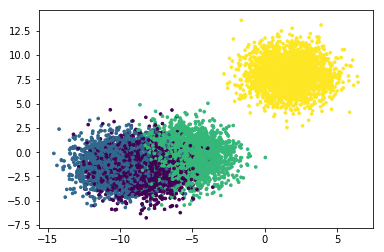

In [45]:
plt.scatter(X_k[:,0],X_k[:,1],s=7,c=y_k)

In [46]:
from sklearn.cluster import KMeans

In [47]:
modele_kmeans=KMeans(n_clusters=4)

In [48]:
#on attribue des groupes aux individus les plus proches
y_pred=modele_kmeans.fit_predict(X_k)

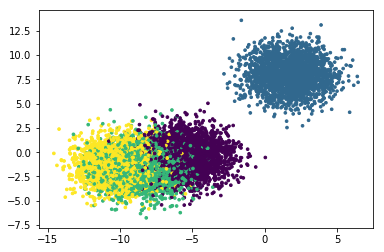

In [49]:
plt.scatter(X_k[:,0],X_k[:,1],s=7,c=y_pred)

In [50]:
modele_kmeans.cluster_centers_

array([[-5.35839389, -0.35282754,  6.24832598, -2.64056492, -6.12778502],
       [ 1.74258402,  8.00385063, -9.73609061, -9.70835344,  2.47542557],
       [-8.3278945 , -1.5418169 , -6.76942359, -9.31942106, -1.73854089],
       [-9.90569033, -1.27654399,  5.28653697, -0.26547646,  1.48789676]])

Les k-means pour le traitement d'une image'

In [51]:
from scipy import misc

In [52]:
face = misc.imread('New York.jpg')

In [53]:
print(face.shape,face.dtype)

(3264, 4896, 3) uint8


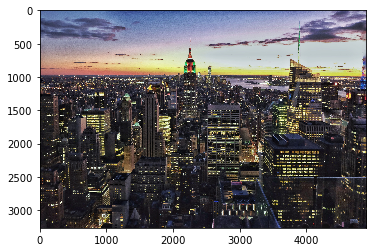

In [54]:
plt.imshow(face)
plt.grid(False)

In [55]:
image=face[::3,::3]/255.0

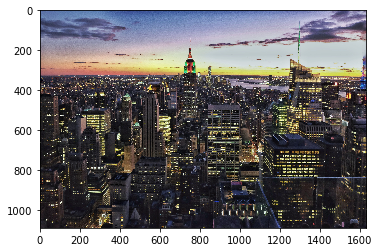

In [56]:
plt.imshow(image)

In [57]:
image2=image.reshape(-1,3)

In [58]:
image2.shape

(1775616, 3)

In [59]:
modele_kmeans2=KMeans(n_clusters=6)

In [60]:
data=modele_kmeans2.fit_predict(image2)

In [61]:
center=modele_kmeans2.cluster_centers_

In [71]:
center

array([[ 0.10478574,  0.09712642,  0.11269626],
       [ 0.79056986,  0.79442476,  0.78232368],
       [ 0.77120513,  0.66708037,  0.45022129],
       [ 0.22445498,  0.20651015,  0.21805768],
       [ 0.41052523,  0.36372316,  0.36082904],
       [ 0.49352415,  0.53158233,  0.68637395]])

In [72]:
new_image=center[data]

In [74]:
new_image=(new_image*255.0).reshape(image.shape)

In [75]:
new_image=new_image.astype(np.uint8)

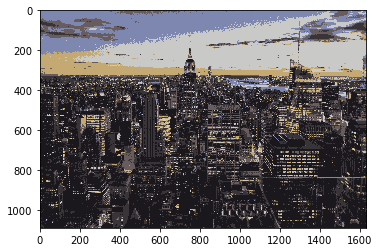

In [77]:
plt.imshow(new_image)